# Naive forecast
## Note: Univariate forecast assuming that $x_{d,h} = x_{d-1,h}$
### *Where d=day and h=hour*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error as MAE

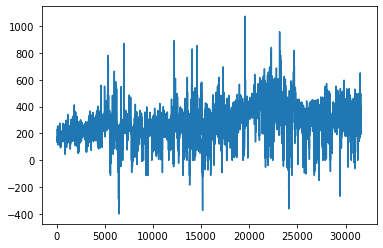

In [2]:
data_naive = pd.read_csv('dfV1.csv')['DK1']   #.set_index('Unnamed: 0')
data_naive_test = data_naive[-10000:]
data_naive_train = data_naive[:-10000]
plt.plot(data_naive_train)

MAE from Naive Forecast:  138.76769622580647


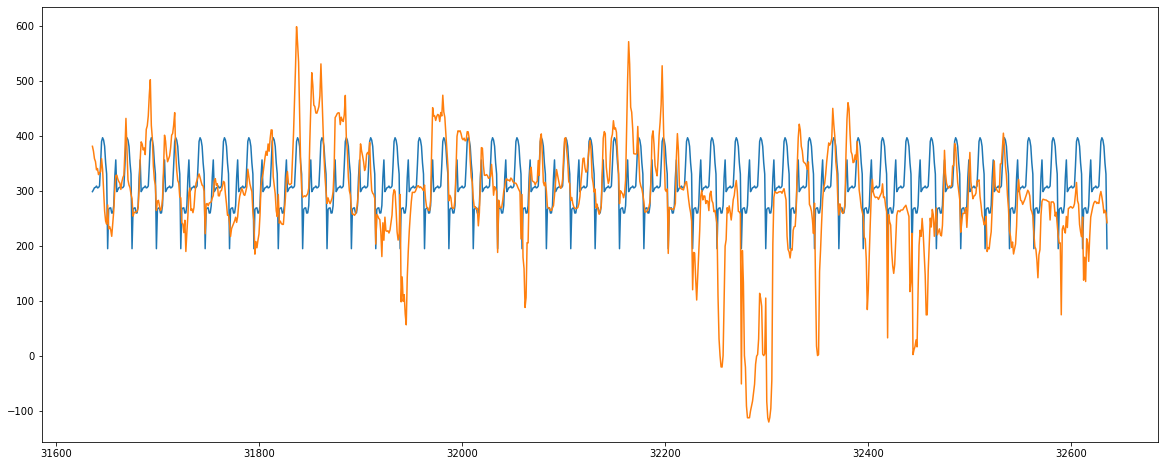

In [3]:
forecaster = NaiveForecaster(strategy='last', sp=24)    # Seasonality trajectory at 24 since prices are folowing daily seasons
forecaster.fit(data_naive_train)
pred = forecaster.predict(list(range(1,10001)))

g = pd.DataFrame([data_naive_test,pred]).T

print('MAE from Naive Forecast: ', MAE(g['DK1'],g['Unnamed 0']))

fig = plt.figure(figsize=(20, 8))
plt.plot(pred[0:1000])
plt.plot(data_naive_test[0:1000])